<h1 style="text-align:center">Projekt 1</h1>

<h1 style="text-align:center">Inżynieria cech, wstępne modelowanie</h1>
<h1 style="text-align:center"><u>School grades</u></h1>
<h1 style="text-align:center"> Karol Degórski i Adrian Kamiński</h1>

### Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Wczytanie danych dotyczących szkolnych ocen

In [2]:
school_grades_df = pd.read_csv('school_grades_dataset.csv')
school_grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [3]:
yes_no_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
other_binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus']
ohe_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
le_cols = yes_no_cols + other_binary_cols

### Kodowanie zmiennych nieliczbowych

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
school_grades_df_encoded = school_grades_df.copy()

labelencoder = LabelEncoder()

school_grades_df_encoded[le_cols] = school_grades_df[le_cols].apply(
    func = lambda x: labelencoder.fit_transform(x)
)

enc = OneHotEncoder()
enc_df = pd.DataFrame(
    enc.fit_transform(school_grades_df_encoded[ohe_cols]).toarray(),
    columns = enc.get_feature_names(input_features = ohe_cols)
)

school_grades_df_encoded = school_grades_df_encoded.join(enc_df).drop(ohe_cols, axis = 1)

In [6]:
school_grades_df_encoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,15,1,1,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
645,1,0,18,1,1,1,3,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,1,0,18,1,0,1,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
647,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Stworzenie osobnego zbioru danych, aby móc porównywać wyniki

In [7]:
school_grades_df_encoded2 = school_grades_df_encoded.copy(deep = True)

### Grupowanie i usunięcie niektórych zmiennych

In [8]:
school_grades_df_encoded.absences = np.log1p(school_grades_df_encoded.absences)

In [9]:
school_grades_df_encoded2.loc[school_grades_df_encoded2['absences'] <= 4, 'absences' ] = 0
school_grades_df_encoded2.loc[(school_grades_df_encoded2['absences'] > 4) 
                              & (school_grades_df_encoded2['absences'] <= 8), 'absences' ] = 1
school_grades_df_encoded2.loc[(school_grades_df_encoded2['absences'] > 8)  
                              & (school_grades_df_encoded2['absences'] <= 12), 'absences' ] = 2
school_grades_df_encoded2.loc[school_grades_df_encoded2['absences'] > 12, 'absences' ] = 3

In [10]:
school_grades_df_encoded2 = school_grades_df_encoded2.drop(['romantic', 'famrel', 
                                                            'paid', 'famsup', 'Pstatus', 'famsize'], axis = 1)

### Podział zbioru na treningowy i testowy

Tworzymy 4 feature set'y:
* A, C - zawierają kolumny G1 i G2
* B, D - nie zawierą kolumn G1 i G2 (które są bardzo mocno skorelowane z G3)

Zbiory C i D zawierają pogrupowaną zmienną absences oraz usunięte zmienne mające znikomy wpływ na zmienną celu G3

In [11]:
X_a = school_grades_df_encoded.drop('G3', axis = 1)
X_b = school_grades_df_encoded.drop(['G1', 'G2', 'G3'], axis = 1)

X_c = school_grades_df_encoded2.drop('G3', axis = 1)
X_d = school_grades_df_encoded2.drop(['G1', 'G2', 'G3'], axis = 1)

y = school_grades_df_encoded.G3

In [12]:
from sklearn.model_selection import train_test_split

Dokonujemy podziału na zbiór testowy i treningowy (Zbiór testowy będzie stanowił 30% całego zbioru)

In [13]:
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(
    X_a, y, test_size=0.3, random_state=42)

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(
    X_b, y, test_size=0.3, random_state=42)

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(
    X_c, y, test_size=0.3, random_state=42)

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(
    X_d, y, test_size=0.3, random_state=42)

### Wybór metryki

W naszym zadaniu do oceny modeli wykorzytsamy miarę RMSE, czyli pierwiastek z błędu średniokwadratowego. Miara ta wydaje się być odpowiednią z uwagi na swego rodzaju ciągłość zmiennej celu, jaką jest ocena końcowa G3. Oceniając model najistotniejsze jest dla nas, czy przewidywana przez dany model ocena znacząco różni się od tej prawdziwej. Niekoniecznie ważne jest czy dokładnie przewidzeliśmy ocenę.

In [14]:
from sklearn.metrics import mean_squared_error

### Las losowy

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc_a = RandomForestClassifier(n_estimators=1500,
                               max_depth=8, 
                               min_samples_split = 2,
                               max_features = 7, 
                               random_state = 0,
                               n_jobs = -1)
rfc_b = RandomForestClassifier(n_estimators=1000, 
                              max_depth=9, 
                              min_samples_split = 2, 
                              max_features = 6, 
                              random_state=0,
                              n_jobs = -1)

rfc_c = RandomForestClassifier(n_estimators=1500,
                               max_depth=8, 
                               min_samples_split = 2,
                               max_features = 7, 
                               random_state = 0,
                               n_jobs = -1)
rfc_d = RandomForestClassifier(n_estimators=1000, 
                              max_depth=9, 
                              min_samples_split = 2, 
                              max_features = 6, 
                              random_state=0,
                              n_jobs = -1)

In [17]:
rfc_a.fit(X_a_train, y_a_train)
y_a_hat = rfc_a.predict(X_a_test)

rfc_mse_a = mean_squared_error(y_a_test, y_a_hat, squared = False)
rfc_mse_a

1.442931489035873

In [18]:
def DrawPlot(y_a_test, y_a_hat, classifier, feature_set="A"):
    plt.figure(figsize=(16,8))
    plt.scatter(x = y_a_hat, y = y_a_test, color = "#FFC300")
    plt.plot([0, 20], [0, 20], color = "black")
  
    plt.title(classifier + " - feature set: " + feature_set +
              "\nRMSE = " + str(round(mean_squared_error(y_a_test, y_a_hat, squared = False), 4)))
    plt.ylabel("Gold standard")
    plt.xlabel("Wartość przybliżona")
    plt.show()

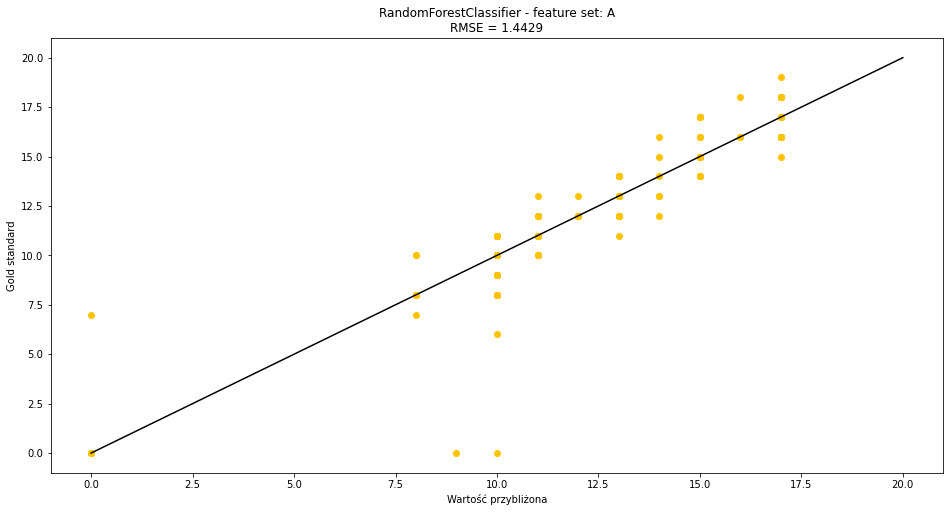

In [19]:
DrawPlot(y_a_test, y_a_hat, "RandomForestClassifier")

In [20]:
rfc_b.fit(X_b_train, y_b_train)
y_b_hat = rfc_b.predict(X_b_test)

rfc_mse_b = mean_squared_error(y_b_test, y_b_hat, squared = False)
rfc_mse_b

3.179259710638989

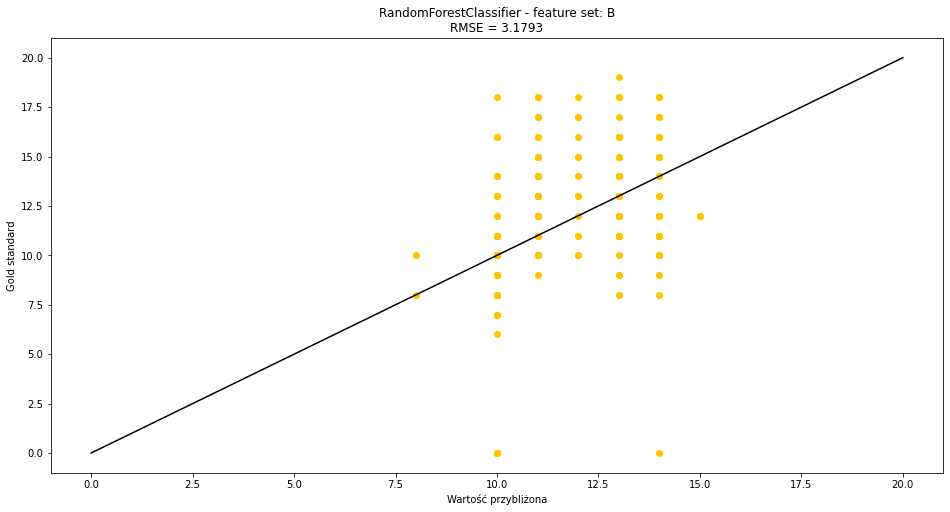

In [21]:
DrawPlot(y_b_test, y_b_hat, "RandomForestClassifier", "B")

In [22]:
rfc_c.fit(X_c_train, y_c_train)
y_c_hat = rfc_c.predict(X_c_test)

rfc_mse_c = mean_squared_error(y_c_test, y_c_hat, squared = False)
rfc_mse_c

1.4358058578855504

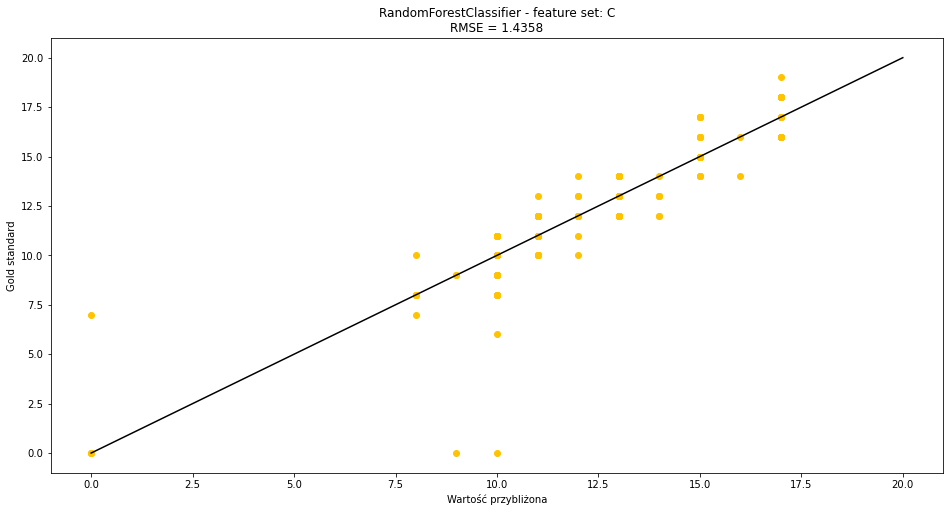

In [23]:
DrawPlot(y_c_test, y_c_hat, "RandomForestClassifier", "C")

In [24]:
rfc_d.fit(X_d_train, y_d_train)
y_d_hat = rfc_d.predict(X_d_test)

rfc_mse_d = mean_squared_error(y_d_test, y_d_hat, squared = False)
rfc_mse_d

3.1929409319421795

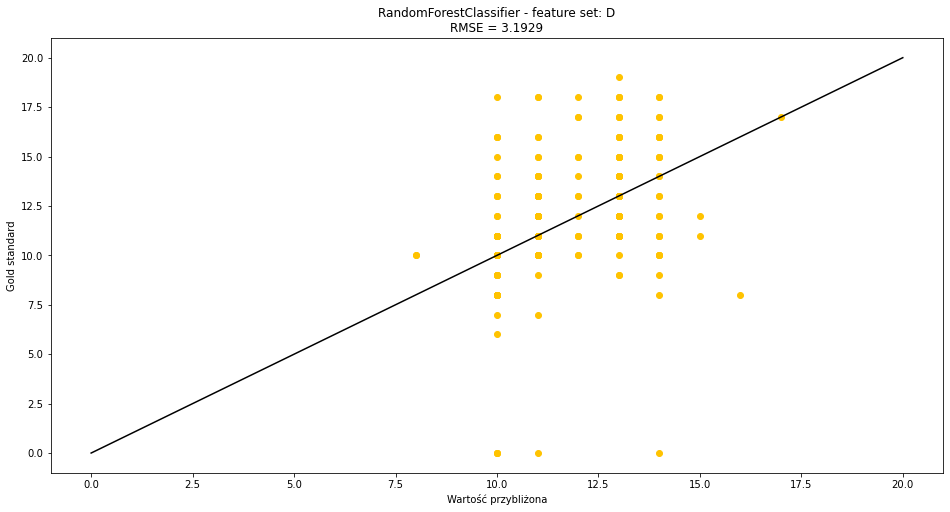

In [25]:
DrawPlot(y_d_test, y_d_hat, "RandomForestClassifier", "D")

### XGBoost

In [26]:
from xgboost import XGBClassifier
xgbc_a=XGBClassifier(random_state=1,
                    learning_rate=0.015,
                    booster='gbtree', 
                    max_depth=2, 
                    eval_metric="logloss")
xgbc_b=XGBClassifier(random_state=1,
                    learning_rate=0.015,
                    booster='gbtree', 
                    max_depth=2, 
                    eval_metric="logloss")

xgbc_c=XGBClassifier(random_state=1,
                    learning_rate=0.015,
                    booster='gbtree', 
                    max_depth=2, 
                    eval_metric="logloss")
xgbc_d=XGBClassifier(random_state=1,
                    learning_rate=0.015,
                    booster='gbtree', 
                    max_depth=2, 
                    eval_metric="logloss")

In [27]:
xgbc_a.fit(X_a_train, y_a_train)
y_a_hat = xgbc_a.predict(X_a_test)

xgbc_mse_a = mean_squared_error(y_a_test, y_a_hat, squared = False)
xgbc_mse_a

1.349263806863884

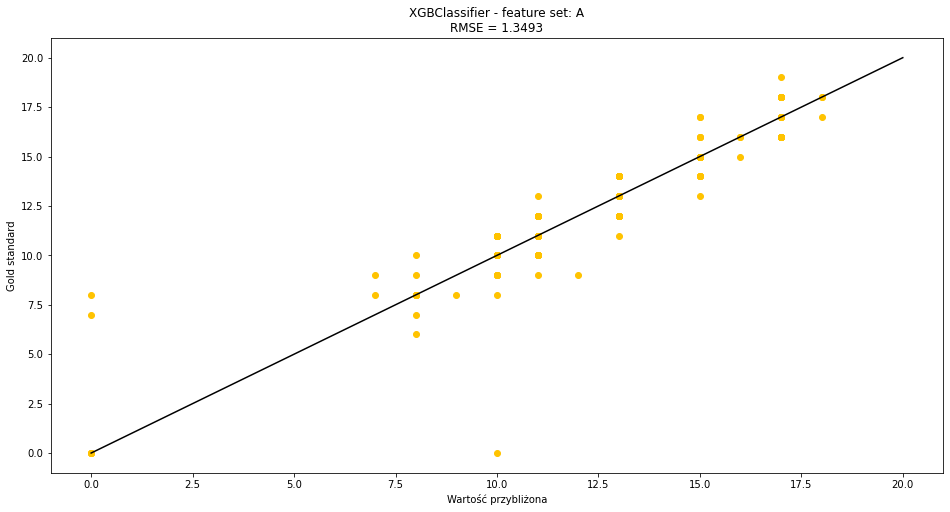

In [28]:
DrawPlot(y_a_test, y_a_hat, "XGBClassifier")

In [29]:
xgbc_b.fit(X_b_train, y_b_train)
y_b_hat = xgbc_b.predict(X_b_test)

xgbc_mse_b = mean_squared_error(y_b_test, y_b_hat, squared = False)
xgbc_mse_b

3.2105595007244934

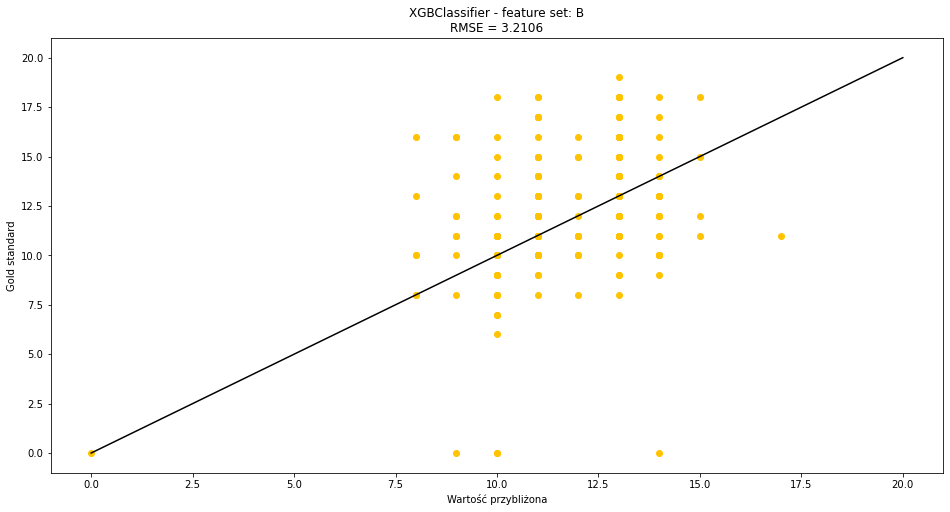

In [30]:
DrawPlot(y_b_test, y_b_hat, "XGBClassifier", "B")

In [31]:
xgbc_c.fit(X_c_train, y_c_train)
y_c_hat = xgbc_c.predict(X_c_test)

xgbc_mse_c = mean_squared_error(y_c_test, y_c_hat, squared = False)
xgbc_mse_c

1.219499687240422

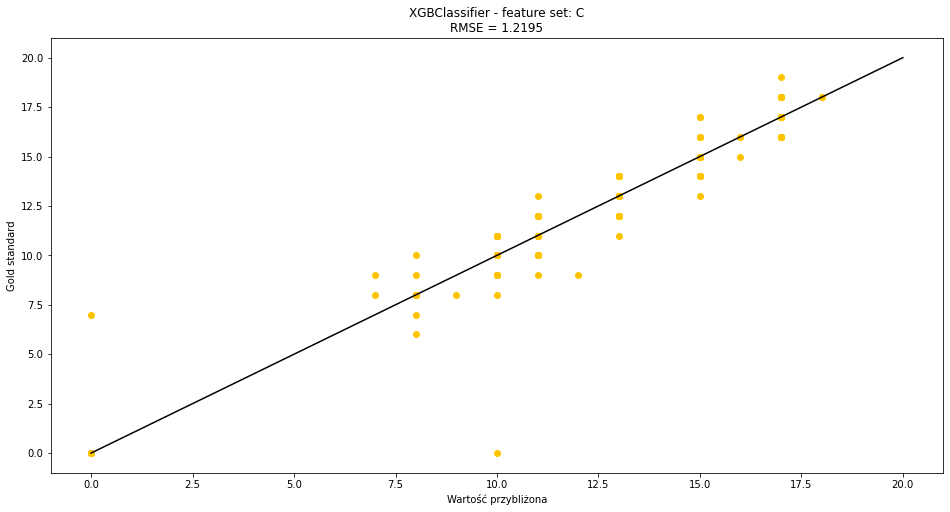

In [32]:
DrawPlot(y_c_test, y_c_hat, "XGBClassifier", "C")

In [33]:
xgbc_d.fit(X_d_train, y_d_train)
y_d_hat = xgbc_d.predict(X_d_test)

xgbc_mse_d = mean_squared_error(y_d_test, y_d_hat, squared = False)
xgbc_mse_d

3.338969593859451

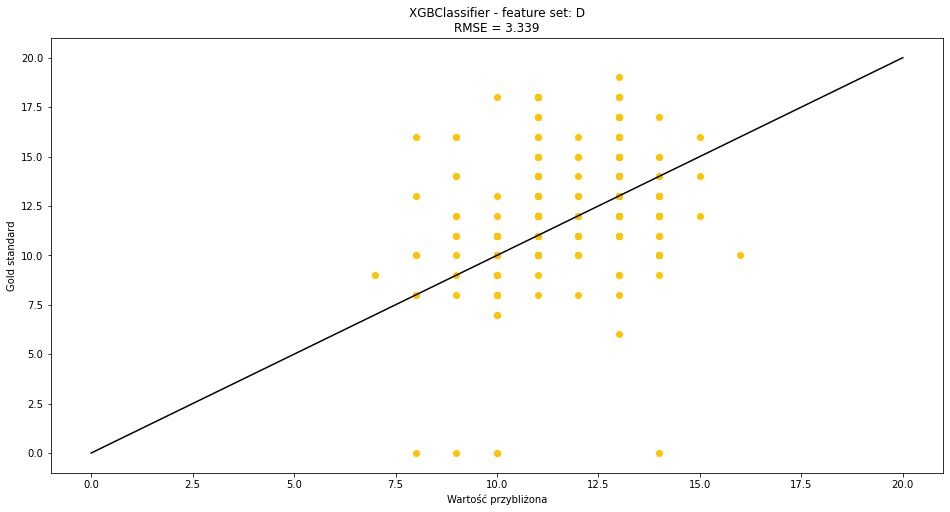

In [34]:
DrawPlot(y_d_test, y_d_hat, "XGBClassifier", "D")

### Stacking Classifier

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [36]:
clf_a = StackingClassifier(estimators=[('RFC', rfc_a), ('xgb', xgbc_a)], final_estimator=LogisticRegression())
clf_b = StackingClassifier(estimators=[('RFC', rfc_b), ('xgb', xgbc_b)], final_estimator=LogisticRegression())

clf_c = StackingClassifier(estimators=[('RFC', rfc_c), ('xgb', xgbc_c)], final_estimator=LogisticRegression())
clf_d = StackingClassifier(estimators=[('RFC', rfc_d), ('xgb', xgbc_d)], final_estimator=LogisticRegression())

In [37]:
clf_a.fit(X_a_train, y_a_train)
y_a_hat = clf_a.predict(X_a_test)

clf_mse_a = mean_squared_error(y_a_test, y_a_hat, squared = False)
clf_mse_a

1.632993161855452

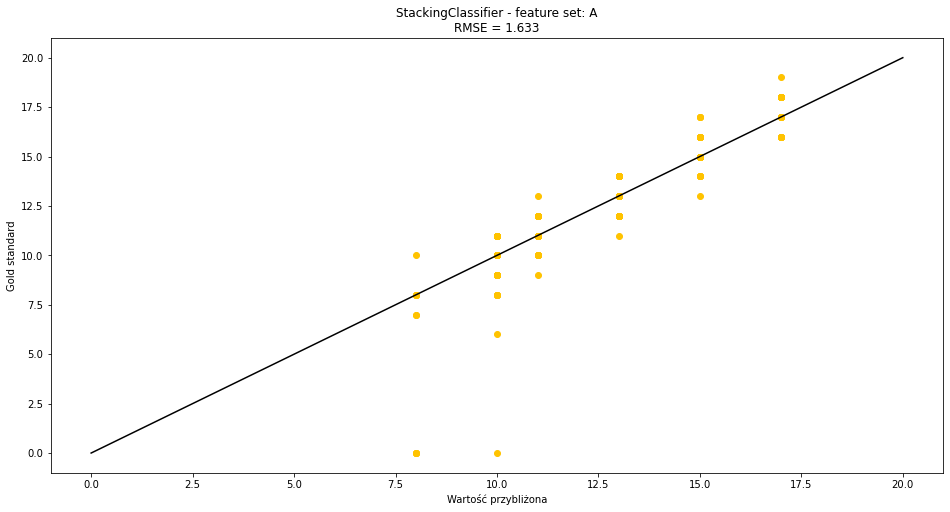

In [38]:
DrawPlot(y_a_test, y_a_hat, "StackingClassifier")

In [39]:
clf_b.fit(X_b_train, y_b_train)
y_b_hat = clf_b.predict(X_b_test)

clf_mse_b = mean_squared_error(y_b_test, y_b_hat, squared = False)
clf_mse_b

3.158220855855235

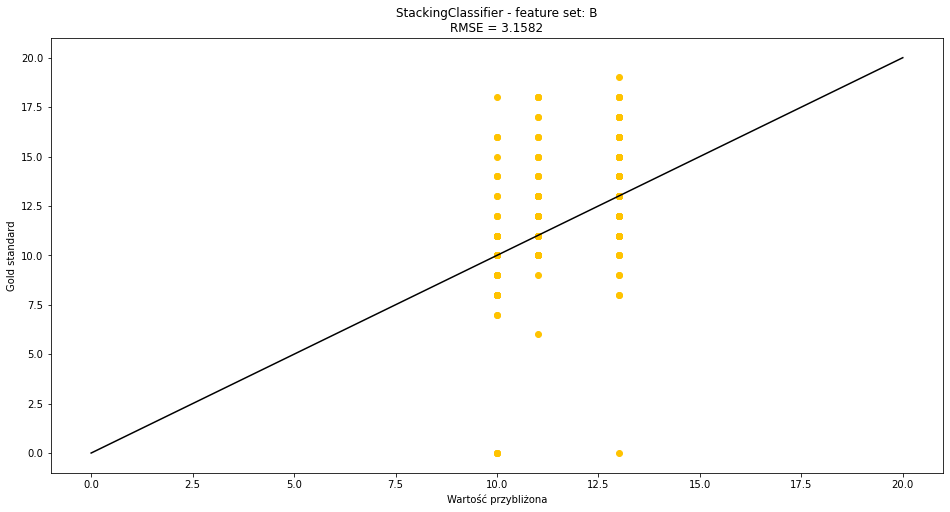

In [40]:
DrawPlot(y_b_test, y_b_hat, "StackingClassifier", "B")

In [41]:
clf_c.fit(X_c_train, y_c_train)
y_c_hat = clf_c.predict(X_c_test)

clf_mse_c = mean_squared_error(y_c_test, y_c_hat, squared = False)
clf_mse_c

1.6172150801252798

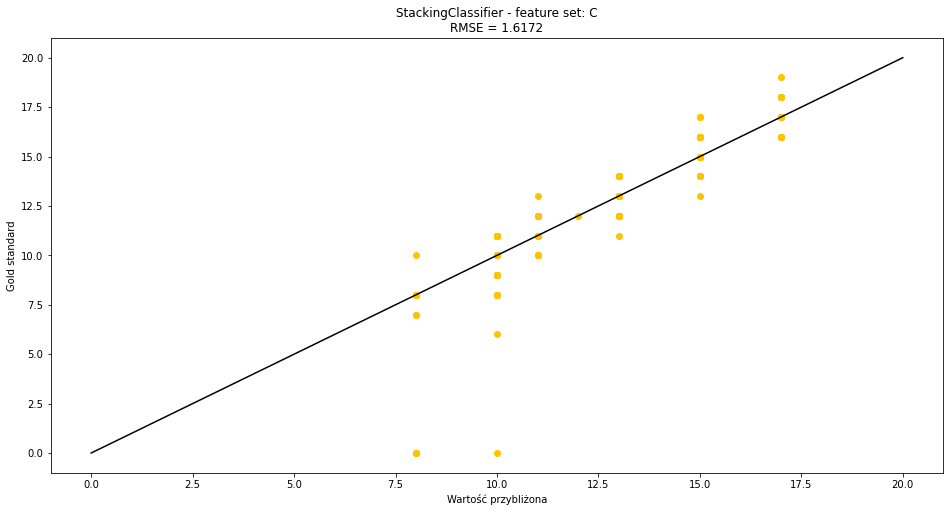

In [42]:
DrawPlot(y_c_test, y_c_hat, "StackingClassifier", "C")

In [43]:
clf_d.fit(X_d_train, y_d_train)
y_d_hat = clf_d.predict(X_d_test)

clf_mse_d = mean_squared_error(y_d_test, y_d_hat, squared = False)
clf_mse_d

3.154971656583646

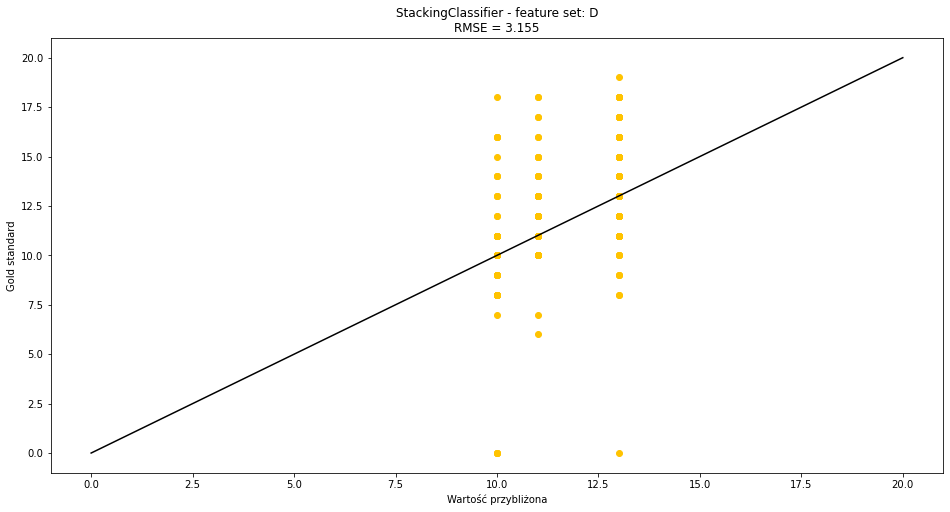

In [44]:
DrawPlot(y_d_test, y_d_hat, "StackingClassifier", "D")

### Voting Classifier

In [45]:
from sklearn.ensemble import VotingClassifier

In [46]:
vc_a = VotingClassifier(estimators=[('RFC', rfc_a), ('xgb', xgbc_a)], voting='soft')


vc_a.fit(X_a_train, y_a_train)
y_a_hat = vc_a.predict(X_a_test)


vc_mse_a = mean_squared_error(y_a_test, y_a_hat, squared = False)
vc_mse_a

1.3587324409735149

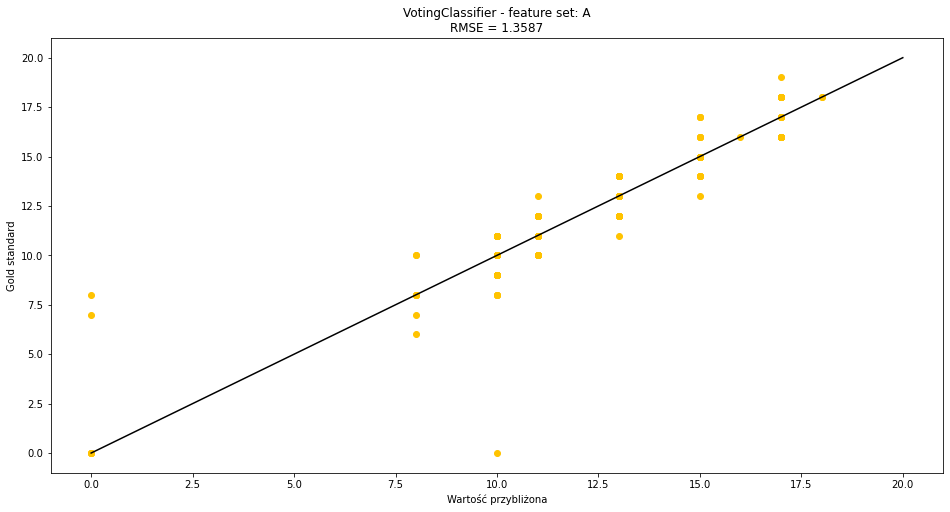

In [47]:
DrawPlot(y_a_test, y_a_hat, 'VotingClassifier')

In [48]:
vc_b = VotingClassifier(estimators=[('RFC', rfc_b), ('xgb', xgbc_b)], voting='soft')


vc_b.fit(X_b_train, y_b_train)
y_b_hat = vc_b.predict(X_b_test)


vc_mse_b = mean_squared_error(y_b_test, y_b_hat, squared = False)
vc_mse_b

3.1083015396737914

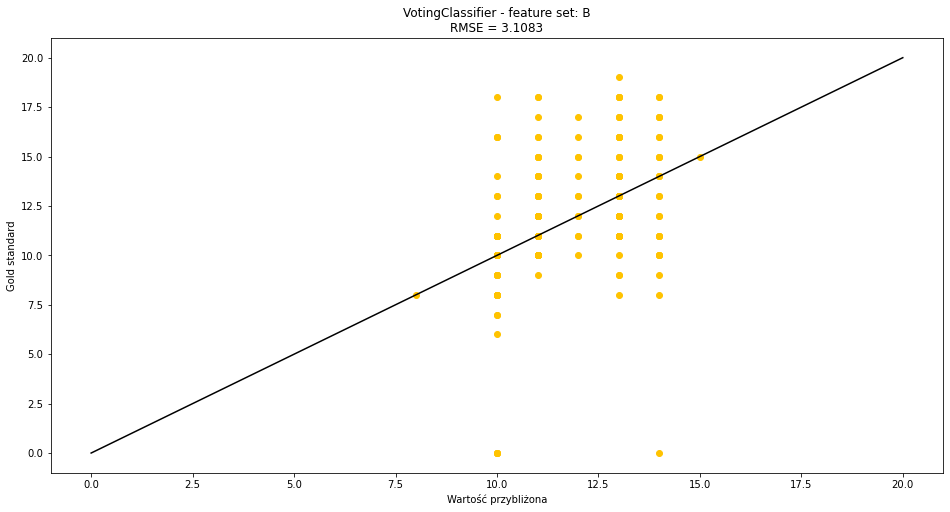

In [49]:
DrawPlot(y_b_test, y_b_hat, 'VotingClassifier', 'B')

In [50]:
vc_c = VotingClassifier(estimators=[('RFC', rfc_c), ('xgb', xgbc_c)], voting='soft')


vc_c.fit(X_c_train, y_c_train)
y_c_hat = vc_c.predict(X_c_test)


vc_mse_c = mean_squared_error(y_c_test, y_c_hat, squared = False)
vc_mse_c

1.2444749691006038

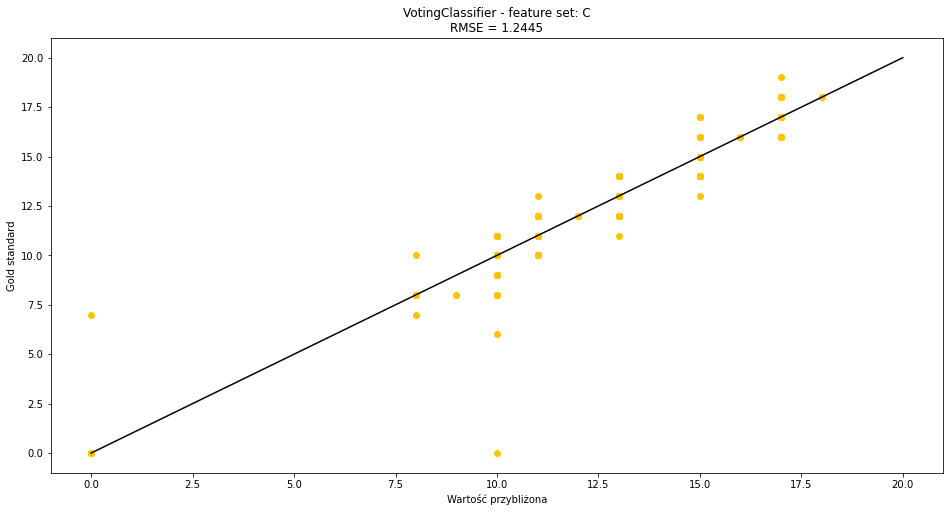

In [51]:
DrawPlot(y_c_test, y_c_hat, 'VotingClassifier', 'C')

In [52]:
vc_d = VotingClassifier(estimators=[('RFC', rfc_d), ('xgb', xgbc_d)], voting='soft')


vc_d.fit(X_d_train, y_d_train)
y_d_hat = vc_d.predict(X_d_test)


vc_mse_d = mean_squared_error(y_d_test, y_d_hat, squared = False)
vc_mse_d

3.1362234352637306

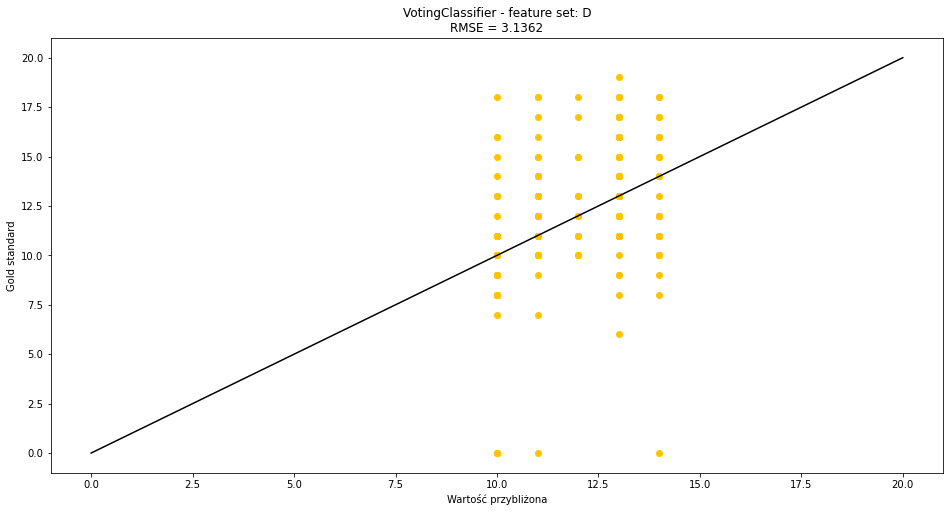

In [53]:
DrawPlot(y_d_test, y_d_hat, 'VotingClassifier', 'D')

### Sieć neuronowa typu MLP

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
mlpc_a = MLPClassifier(alpha=0.0001, activation='relu', learning_rate = 'adaptive', solver='adam',
                     hidden_layer_sizes=(121, ), random_state=1)



mlpc_a.fit(X_a_train, y_a_train)
y_a_hat = mlpc_a.predict(X_a_test)



mlpc_mse_a = mean_squared_error(y_a_test, y_a_hat, squared = False)
mlpc_mse_a

1.6748516964579894

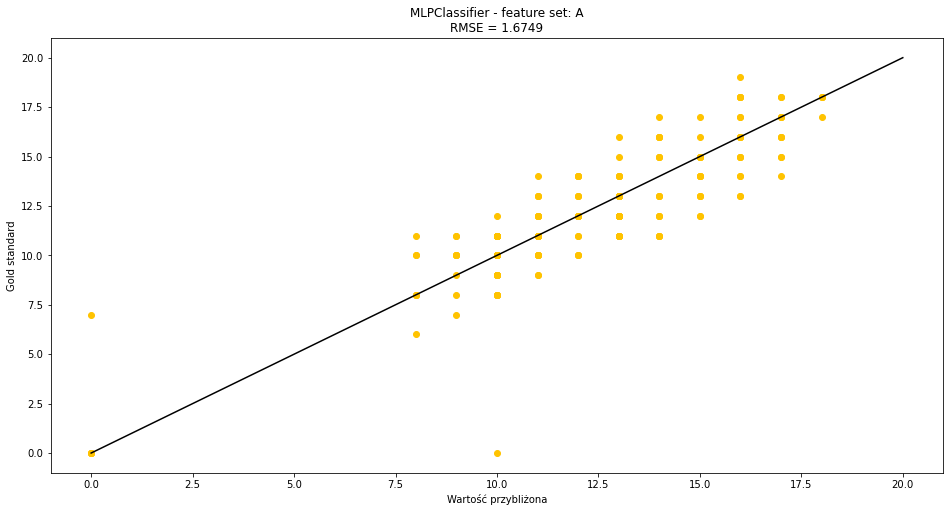

In [56]:
DrawPlot(y_a_test, y_a_hat, 'MLPClassifier')

In [57]:
mlpc_b = MLPClassifier(alpha=0.00001, activation='relu', learning_rate = 'adaptive', solver='adam',
                     hidden_layer_sizes=(51, ), random_state=1)



mlpc_b.fit(X_b_train, y_b_train)
y_b_hat = mlpc_b.predict(X_b_test)


mlpc_mse_b = mean_squared_error(y_b_test, y_b_hat, squared = False)
mlpc_mse_b

2.9776948578836393

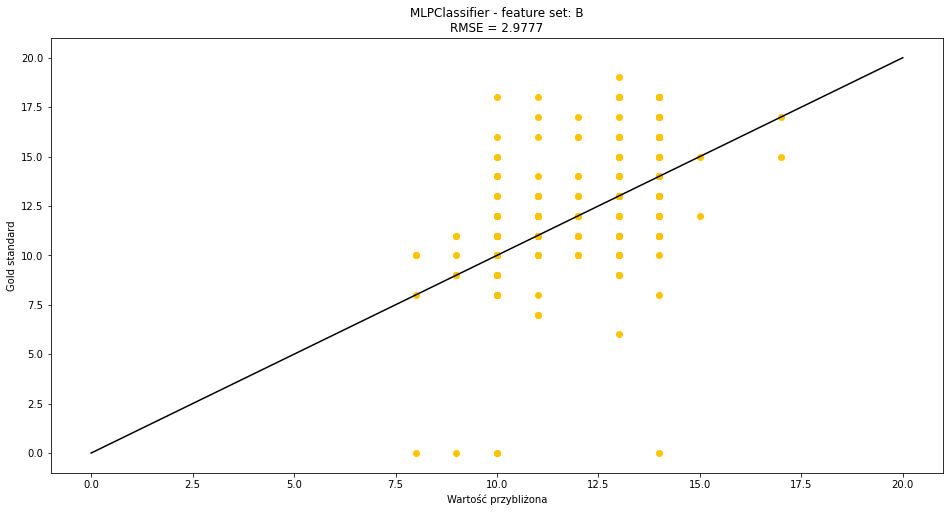

In [58]:
DrawPlot(y_b_test, y_b_hat, 'MLPClassifier', "B")

In [59]:
mlpc_c = MLPClassifier(alpha=0.0001, activation='relu', learning_rate = 'adaptive', solver='adam',
                     hidden_layer_sizes=(121, ), random_state=1)



mlpc_c.fit(X_c_train, y_c_train)
y_c_hat = mlpc_c.predict(X_c_test)



mlpc_mse_c = mean_squared_error(y_c_test, y_c_hat, squared = False)
mlpc_mse_c

1.7917188424126176

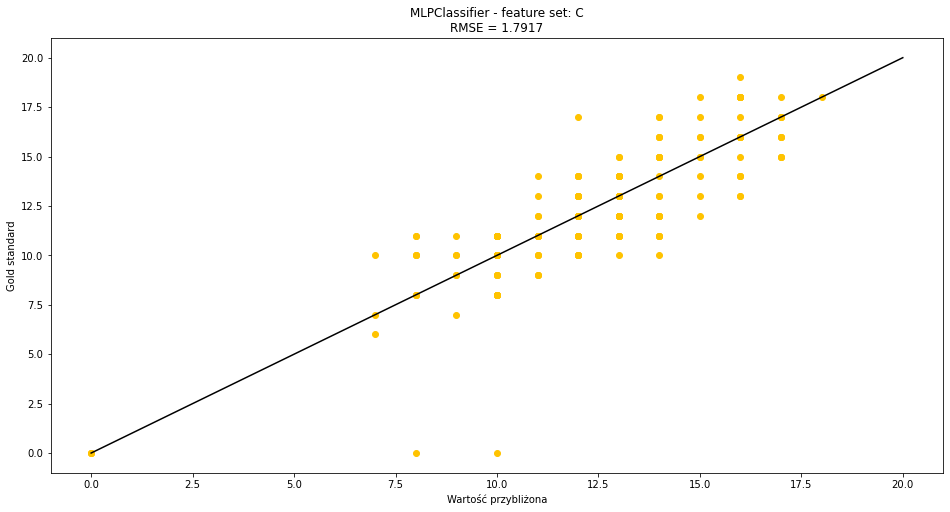

In [60]:
DrawPlot(y_c_test, y_c_hat, 'MLPClassifier', 'C')

In [61]:
mlpc_d = MLPClassifier(alpha=0.0001, activation='relu', learning_rate = 'adaptive', solver='adam',
                     hidden_layer_sizes=(121, ), random_state=1)



mlpc_d.fit(X_d_train, y_d_train)
y_d_hat = mlpc_d.predict(X_d_test)



mlpc_mse_d = mean_squared_error(y_d_test, y_d_hat, squared = False)
mlpc_mse_d

3.4544657088084305

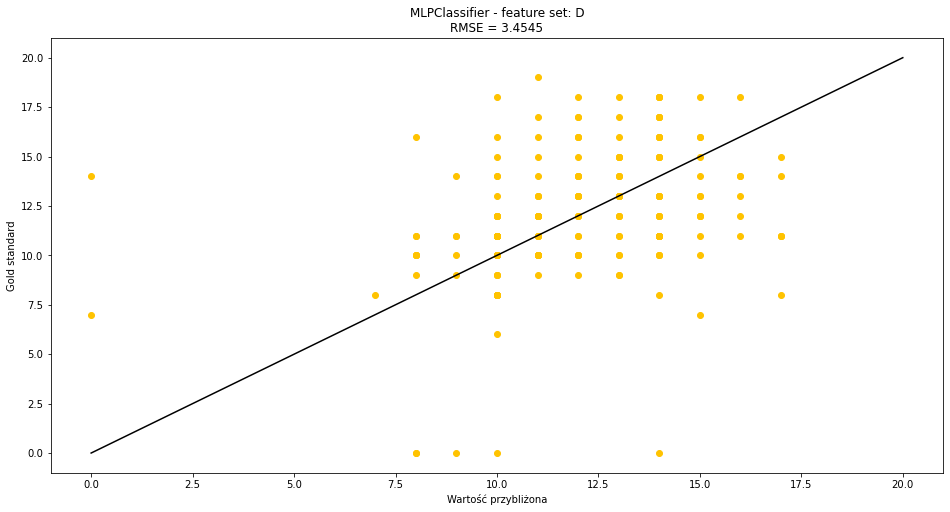

In [62]:
DrawPlot(y_d_test, y_d_hat, 'MLPClassifier', 'D')

### Regresja liniowa

Potraktujmy nasze zadanie jako problem regresji i zastosujmy podstawową metodę uczenia maszynowego, jaką jest regresja liniowa

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr_a = LinearRegression()
lr_b = LinearRegression()

lr_c = LinearRegression()
lr_d = LinearRegression()

In [65]:
lr_a.fit(X_a_train, y_a_train)
y_a_hat = lr_a.predict(X_a_test)

lr_mse_a = mean_squared_error(y_a_test, np.ceil(y_a_hat), squared = False)
lr_mse_a

1.3662601021279464

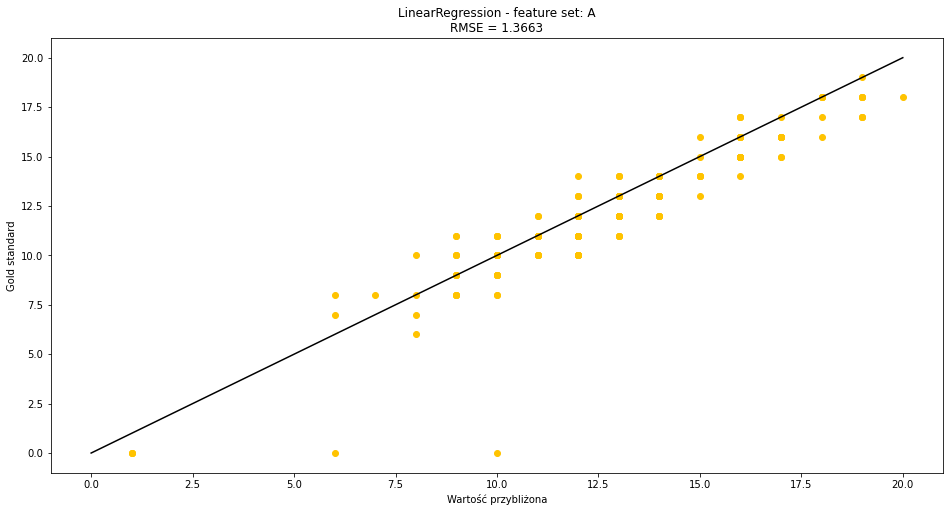

In [66]:
DrawPlot(y_a_test, np.ceil(y_a_hat), 'LinearRegression')

In [67]:
lr_b.fit(X_b_train, y_b_train)
y_b_hat = lr_b.predict(X_b_test)

lr_mse_b = mean_squared_error(y_b_test, np.ceil(y_b_hat), squared = False)
lr_mse_b

2.9759721531644505

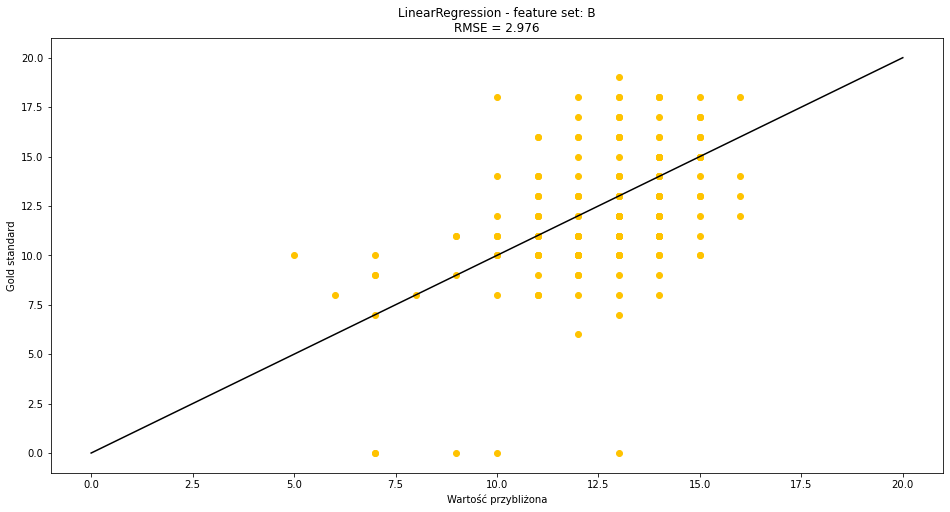

In [68]:
DrawPlot(y_b_test, np.ceil(y_b_hat), 'LinearRegression', 'B')

In [69]:
lr_c.fit(X_c_train, y_c_train)
y_c_hat = lr_c.predict(X_c_test)

lr_mse_c = mean_squared_error(y_c_test, np.ceil(y_c_hat), squared = False)
lr_mse_c

1.3530592118489237

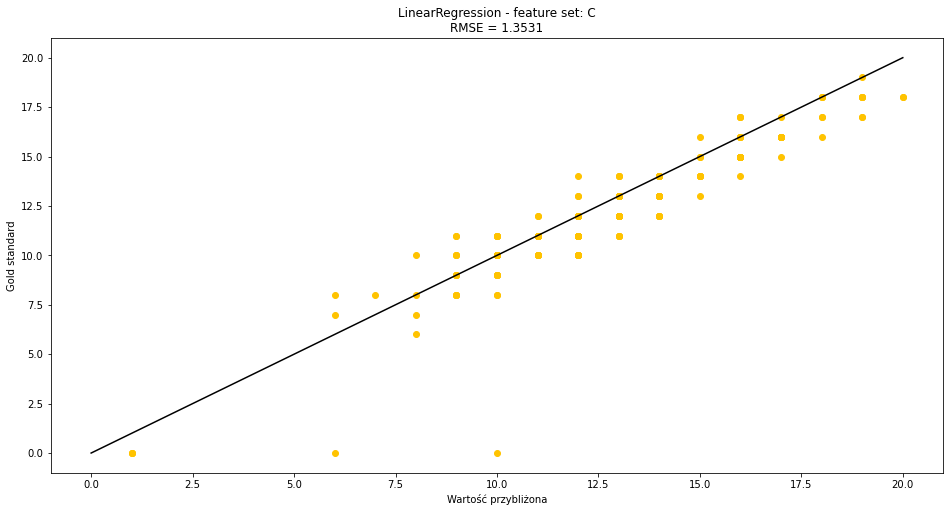

In [70]:
DrawPlot(y_c_test, np.ceil(y_c_hat), 'LinearRegression', 'C')

In [71]:
lr_d.fit(X_d_train, y_d_train)
y_d_hat = lr_d.predict(X_d_test)

lr_mse_d = mean_squared_error(y_d_test, np.ceil(y_d_hat), squared = False)
lr_mse_d

3.007682470965618

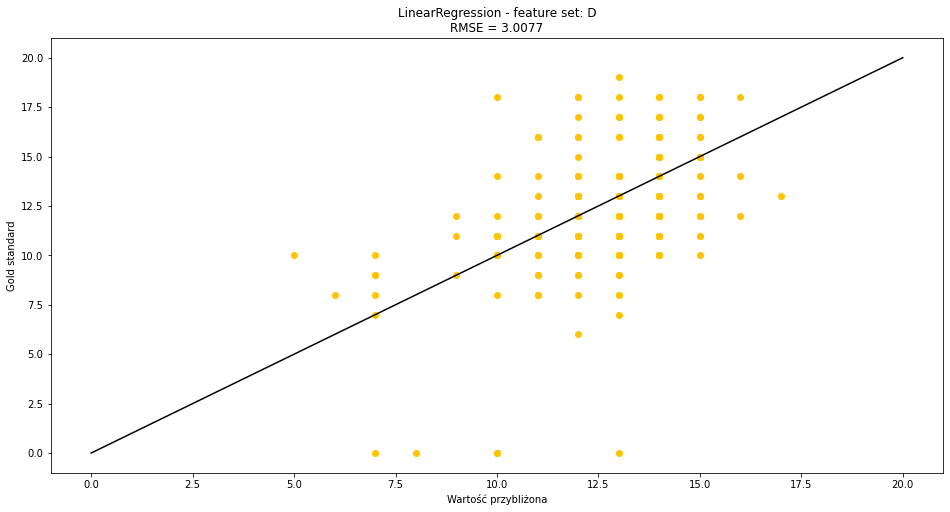

In [72]:
DrawPlot(y_d_test, np.ceil(y_d_hat), 'LinearRegression', 'D')

### Podsumowanie

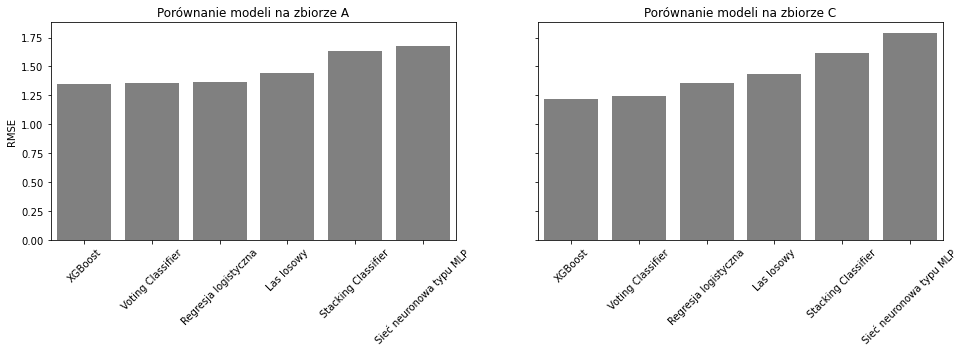

In [73]:
fig, axs = plt.subplots(1, 2, figsize = (16, 4), sharey = True)
x= np.array(['Las losowy', 'XGBoost', 'Stacking Classifier', 'Voting Classifier', 'Sieć neuronowa typu MLP', 'Regresja logistyczna'])
y = np.array([rfc_mse_a, xgbc_mse_a, clf_mse_a, vc_mse_a, mlpc_mse_a, lr_mse_a])
plot_data = pd.DataFrame({
        'x': x,
        'y': y})

sns.barplot(data = plot_data, x=x, y=y, order=plot_data.sort_values(['y']).x, color = 'grey', ax=axs[0])
axs[0].set_title('Porównanie modeli na zbiorze A')

axs[0].set_ylabel("RMSE")


y = np.array([rfc_mse_c, xgbc_mse_c, clf_mse_c, vc_mse_c, mlpc_mse_c, lr_mse_c])
plot_data = pd.DataFrame({
        'x': x,
        'y': y})

sns.barplot(data = plot_data, x=x, y=y, order=plot_data.sort_values(['y']).x, color = 'grey', ax=axs[1])
axs[1].set_title('Porównanie modeli na zbiorze C')


for i in range(0, 2):    
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(45)

plt.show()

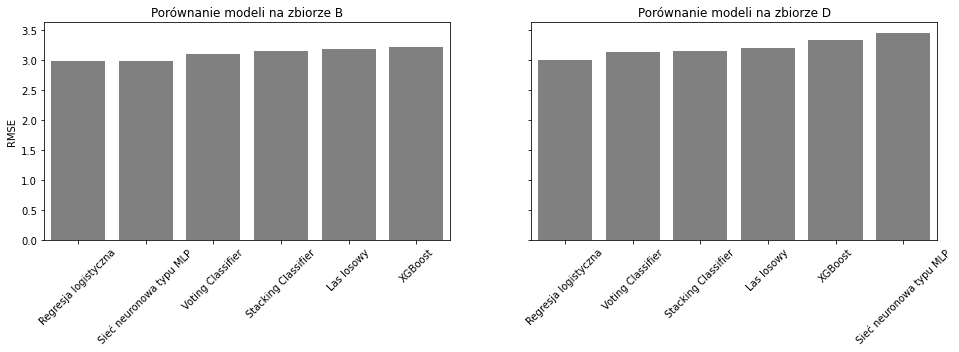

In [74]:
fig, axs = plt.subplots(1, 2, figsize = (16, 4), sharey = True)
x= np.array(['Las losowy', 'XGBoost', 'Stacking Classifier', 'Voting Classifier', 'Sieć neuronowa typu MLP', 'Regresja logistyczna'])
y = np.array([rfc_mse_b, xgbc_mse_b, clf_mse_b, vc_mse_b, mlpc_mse_b, lr_mse_b])
plot_data = pd.DataFrame({
        'x': x,
        'y': y})

sns.barplot(data = plot_data, x=x, y=y, order=plot_data.sort_values(['y']).x, color = 'grey', ax=axs[0])
axs[0].set_title('Porównanie modeli na zbiorze B')

axs[0].set_ylabel("RMSE")


y = np.array([rfc_mse_d, xgbc_mse_d, clf_mse_d, vc_mse_d, mlpc_mse_d, lr_mse_d])
plot_data = pd.DataFrame({
        'x': x,
        'y': y})

sns.barplot(data = plot_data, x=x, y=y, order=plot_data.sort_values(['y']).x, color = 'grey', ax=axs[1])
axs[1].set_title('Porównanie modeli na zbiorze D')


for i in range(0, 2):    
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(45)

plt.show()

Okazuje się, że zwykła podstawowa metoda, jaką jest regresja liniowa przewiduje z dużą dokładnością naszą zmienną celu G3 (ma najmniejszy pierwiastek błędu średniokwadratowego), zarówno na zbiorze A, jak i B.  

Tak jak się spodziewaliśmy, dokładność predykcji na zbiorze A (uwzględniającym oceny G1 i G2) jest znacząco dokładniejsza niż na zbiorze B, który tych ocen nie uwzględnia. Wynika to z bardzo dużej korelcji między tymi ocenami, a oceną G3.

Pogrupowanie zmiennej absences w grupie pozwoliło na uzyskanie bardziej dokładnych wyników (zbiory C i D)

Nasze modele wymagają jeszcze wyboru hiperametrów